In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question2

In [2]:
df = pd.read_csv('calibrationcurve.csv',skiprows=19)

In [3]:
df

,Pitot/static Probe Velocity [m/s],Hotwire Ev [Volts]
0,0.362,1.262
1,0.363,1.266
2,0.428,1.261
3,0.442,1.288
4,0.510,1.334
...,...,...
110,21.071,2.072
111,21.103,2.071
112,21.137,2.074
113,21.214,2.075


In [4]:
df['a_0']=131.955;
df['a_1']=-326.703
df['a_2']=309.377;
df['a_3']=-136.269;
df['a_4']=24.409

In [5]:
df

,Pitot/static Probe Velocity [m/s],Hotwire Ev [Volts],a_0,a_1,a_2,a_3,a_4
0,0.362,1.262,131.955,-326.703,309.377,-136.269,24.409
1,0.363,1.266,131.955,-326.703,309.377,-136.269,24.409
2,0.428,1.261,131.955,-326.703,309.377,-136.269,24.409
3,0.442,1.288,131.955,-326.703,309.377,-136.269,24.409
4,0.510,1.334,131.955,-326.703,309.377,-136.269,24.409
...,...,...,...,...,...,...,...
110,21.071,2.072,131.955,-326.703,309.377,-136.269,24.409
111,21.103,2.071,131.955,-326.703,309.377,-136.269,24.409
112,21.137,2.074,131.955,-326.703,309.377,-136.269,24.409
113,21.214,2.075,131.955,-326.703,309.377,-136.269,24.409


In [6]:
df.columns

Index(['Pitot/static Probe Velocity [m/s]', ' Hotwire Ev [Volts]', 'a_0',
       'a_1', 'a_2', 'a_3', 'a_4'],
      dtype='object')

In [7]:
df.to_csv('table1.csv')

In [8]:
calibration_coef = np.poly1d([24.409,-136.269,309.377,-326.703,131.955])
print(calibration_coef)                     

       4         3         2
24.41 x - 136.3 x + 309.4 x - 326.7 x + 132


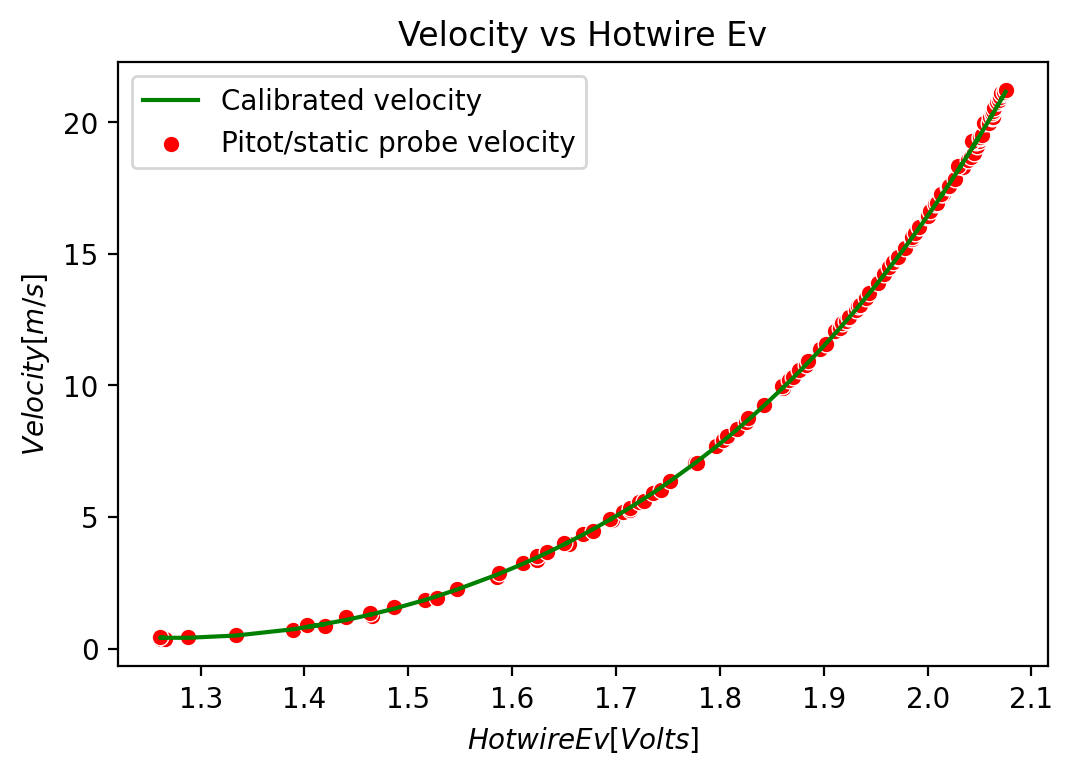

In [9]:
plt.figure(dpi=200);
sns.scatterplot(x=' Hotwire Ev [Volts]',y='Pitot/static Probe Velocity [m/s]',data=df,label='Pitot/static probe velocity',color='r');
plt.plot(df[' Hotwire Ev [Volts]'].values,np.polyval(calibration_coef,df[' Hotwire Ev [Volts]'].values),'-g',label='Calibrated velocity');
plt.legend();
plt.ylabel('$Velocity[m/s]$');
plt.xlabel('$Hotwire Ev[Volts]$');
plt.title('Velocity vs Hotwire Ev');
plt.savefig('question1.png',dpi=200)

# Question3

In [10]:
velocity1 = pd.read_csv('velocity1.csv',skiprows=15)
velocity2 = pd.read_csv('velocity2.csv',skiprows=15)
velocity3 = pd.read_csv('velocity3.csv',skiprows=15)
velocity4 = pd.read_csv('velocity4.csv',skiprows=15)

In [11]:
velocity1.columns

Index(['Lateral Position [mm]', ' Pitot/Static Vel [m/s]',
       ' Pitot/Static Vel Stdev [m/s]', ' Hot Wire Vel [m/s]',
       ' Hot Wire Vel Stdev [m/s]'],
      dtype='object')

In [12]:
v1_infinity=20.244
v2_infinity=20.295
v3_infinity=20.317
v4_infinity=20.143
#will be used to normalize velocity

In [13]:
y0_1 =velocity1['Lateral Position [mm]'][np.argmin(velocity1['Lateral Position [mm]'])]
y0_2 =velocity1['Lateral Position [mm]'][np.argmin(velocity2['Lateral Position [mm]'])]
y0_3 =velocity1['Lateral Position [mm]'][np.argmin(velocity3['Lateral Position [mm]'])]
y0_4 =velocity1['Lateral Position [mm]'][np.argmin(velocity4['Lateral Position [mm]'])]
D = 120 #mm
#will be used to normalzie lateral location

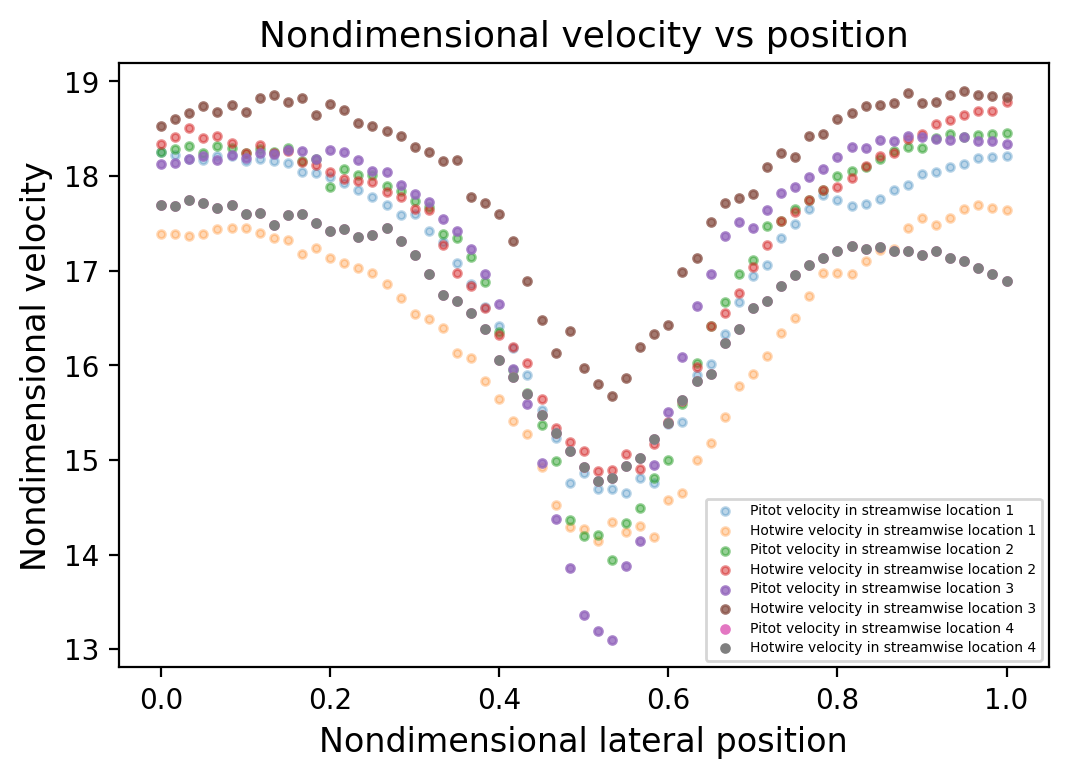

In [14]:
#comment: should I use scatter plot or line plot??? 
plt.figure(dpi=200)
plt.scatter((velocity1['Lateral Position [mm]']-y0_1)/D,velocity1[' Pitot/Static Vel [m/s]'],\
            label='Pitot velocity in streamwise location 1',s=8,alpha=0.3);

plt.scatter((velocity1['Lateral Position [mm]']-y0_1)/D,velocity1[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 1',s=8,alpha=0.3);

plt.scatter((velocity2['Lateral Position [mm]']-y0_2)/D,velocity2[' Pitot/Static Vel [m/s]'],\
            label='Pitot velocity in streamwise location 2',s=8,alpha=0.5);

plt.scatter((velocity2['Lateral Position [mm]']-y0_2)/D,velocity2[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 2',s=8,alpha=0.5);

plt.scatter((velocity3['Lateral Position [mm]']-y0_3)/D,velocity3[' Pitot/Static Vel [m/s]'],\
            label='Pitot velocity in streamwise location 3',s=8,alpha=0.8);

plt.scatter((velocity3['Lateral Position [mm]']-y0_3)/D,velocity3[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 3',s=8,alpha=0.8);

plt.scatter((velocity4['Lateral Position [mm]']-y0_4)/D,velocity4[' Hot Wire Vel [m/s]'],\
            label='Pitot velocity in streamwise location 4',s=8);

plt.scatter((velocity4['Lateral Position [mm]']-y0_4)/D,velocity4[' Hot Wire Vel [m/s]'],\
            label='Hotwire velocity in streamwise location 4',s=8);

plt.legend(loc='lower right',prop={'size': 5},labelspacing=0.4);
plt.xlabel('Nondimensional lateral position',fontsize=12);
plt.ylabel('Nondimensional velocity',fontsize=12);
plt.title('Nondimensional velocity vs position',fontsize=13);

# Question 4

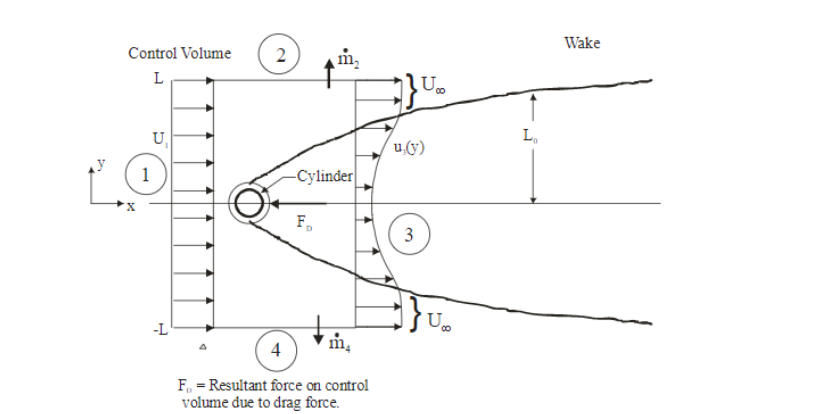

We start with 4 surfaces within the control volume, labeld 1,2,3,4, as shown above.
Force balance: 

-F_D = $-\mathrm{w} \rho \int_{-L}^{L} \mathrm{U}_{1} \mathrm{U}_{1} \mathrm{~d} \mathrm{y}+\mathrm{w} \rho \int_{-\mathrm{L}}^{\mathrm{L}} \mathrm{u}_{3}(\mathrm{y}) \mathrm{u}_{3}(\mathrm{y}) \mathrm{dy}+\left(\dot{\mathrm{m}}_{2}+\dot{\mathrm{m}}_{4}\right) \mathrm{U}_{1}$

Mass balance:

0 = $-\mathrm{w} \rho \int_{-\mathrm{L}}^{\mathrm{L}} \mathrm{U}_{1} \mathrm{dy}+\mathrm{w} \rho \int_{-\mathrm{L}}^{\mathrm{L}} \mathrm{u}_{3}(\mathrm{y}) \mathrm{d} \mathrm{y}+\left(\dot{\mathrm{m}}_{2}+\dot{\mathrm{m}}_{4}\right)$


Therefore, multiply the mass balance quation by $\mathrm{U}_{1}$ and combine with force balance:
$F_{D}=\rho_{\infty} w \int_{-L}^{L} u_{3}(y)\left[U_{1}-u_{3}(y)\right] d y$

# Question 7

In [15]:
FFT1=pd.read_excel('FFT1.xlsx', sheet_name='sheet1')

In [16]:
FFT1

,Untitled,Untitled 1,Untitled 2,Untitled 3,Untitled 4,Untitled 5,Untitled 6,Untitled 7,Untitled 8,Untitled 9,...,Untitled 40,Untitled 41,Untitled 42,Untitled 43,Untitled 44,Untitled 45,Untitled 46,Untitled 47,Untitled 48,Untitled 49
0,7.399978,3.996922,7.708234,7.119835,7.840258,8.438872,6.152068,7.677999,9.300579,7.458925,...,7.758818,8.722872,7.053385,4.563250,9.930900,5.596143,3.921020,7.062850,6.959236,6.177837
1,7.263756,3.561878,7.034482,6.968610,7.850482,8.590927,6.015916,8.923612,8.934864,7.399978,...,7.779119,8.867509,10.440257,4.577195,10.065664,5.774599,4.811530,7.538053,8.558174,5.750032
2,7.053385,3.192412,6.041280,6.792060,8.109282,8.756092,5.628297,9.116349,8.689745,7.399978,...,7.789285,9.093514,9.082112,5.636356,9.393735,5.857025,5.460923,7.922324,8.310136,5.250879
3,6.856724,2.900408,4.942762,6.618754,8.140755,8.878708,5.335759,8.267549,8.525514,7.390187,...,7.799460,9.196610,8.067458,5.266242,8.363598,5.628297,5.832211,8.267549,6.386769,4.753983
4,6.591683,2.743890,4.054495,6.430922,8.182859,9.104926,5.312516,8.140755,8.352885,7.341372,...,7.830044,9.335431,8.979980,4.514670,6.439779,5.390269,6.169239,8.547277,6.195060,4.243816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,8.267549,8.046605,5.923560,9.265825,8.088350,3.651001,7.860716,6.782858,7.186738,10.942992,...,8.678724,8.406551,7.953261,10.314236,5.453041,7.567883,7.597799,1.277630,3.864734,6.555713
1020,9.036613,7.528128,5.588125,9.534783,8.161787,4.022441,8.005020,6.773665,7.331637,9.991986,...,7.912031,8.182859,8.151266,10.414960,4.237190,11.891659,6.229607,1.459855,4.177871,7.119835
1021,9.300579,7.429409,5.227894,8.689745,7.953261,4.725388,8.067458,6.773665,8.912370,10.877526,...,8.182859,7.963593,8.288822,8.525514,4.022441,11.234632,6.502021,2.466225,4.833233,7.577846
1022,9.677419,7.488527,4.840483,7.158010,7.718331,5.774599,8.203971,6.636845,8.845141,10.708717,...,7.840258,7.819839,8.449666,9.440576,3.870961,11.061589,6.152068,3.579585,5.660581,8.503792


In [17]:
headers=FFT1.columns

In [33]:
n=1024

In [34]:
Freestream10=np.fft.fft(FFT1)
freq10=np.fft.fftfreq(n)

c:\users\catherine\miniconda3\envs\ae353-bullet\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


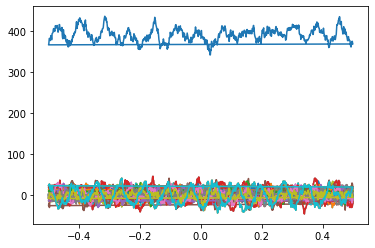

In [35]:
plt.plot(freq10, Freestream10)